# Project Overview

## Merekomendasikan restoran teratas berdasarkan preferensi konsumen menggunakan popularitas dan sistem rekomendasi kolaboratif


# Business Understanding





Mengistal paket kaggle


In [1]:
# Install packages kaggle
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mfadliramadhan","key":"2d9d53c1fae9a77c8ab0a4b51df712f5"}'}

Membuat direktori kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle


kaggle.json


# Data Understanding


Import paket dan download dataset


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.sparse

import warnings
warnings.simplefilter('ignore')

Mendownload dataset menggunakan API Command Kaggle

In [4]:
!kaggle datasets download -d uciml/restaurant-data-with-consumer-ratings --force

  0% 0.00/38.9k [00:00<?, ?B/s]
100% 38.9k/38.9k [00:00<00:00, 4.28MB/s]


Membuka zip file dataset

In [5]:
# Membuka zip pada dataset
!unzip /content/restaurant-data-with-consumer-ratings.zip

Archive:  /content/restaurant-data-with-consumer-ratings.zip
  inflating: README                  
  inflating: chefmozaccepts.csv      
  inflating: chefmozcuisine.csv      
  inflating: chefmozhours4.csv       
  inflating: chefmozparking.csv      
  inflating: geoplaces2.csv          
  inflating: rating_final.csv        
  inflating: usercuisine.csv         
  inflating: userpayment.csv         
  inflating: userprofile.csv         


Terdapat 10 file yang terdapat pada folder dataset tersebut. Namun, kita hanya menggunakan dataset yang berasal dari file rating_final.csv



In [6]:
# Membaca data - data diatas menggunakan fungsi pandas.read_csv
data = pd.read_csv('rating_final.csv')
data



,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


Menampilkan informasi tipe data pada kolom

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userID          1161 non-null   object
 1   placeID         1161 non-null   int64 
 2   rating          1161 non-null   int64 
 3   food_rating     1161 non-null   int64 
 4   service_rating  1161 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 45.5+ KB


Ringkasan statistik dataset

In [8]:
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
userID,1161,138,U1061,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
placeID,1161,NaN,NaN,NaN,134192,1100.92,132560,132856,135030,135059,135109
rating,1161,NaN,NaN,NaN,1.19983,0.773282,0,1,1,2,2
food_rating,1161,NaN,NaN,NaN,1.21533,0.792294,0,1,1,2,2
service_rating,1161,NaN,NaN,NaN,1.09044,0.790844,0,0,1,2,2


## Exploratory Data Analysis

Tahap eksplorasi penting untuk memahami variabel-variabel pada data serta korelasi antar variabel. Pemahaman terhadap variabel pada data dan korelasinya akan membantu kita dalam menentukan pendekatan atau algoritma yang cocok untuk data kita.



## Exploratory Data Analysis

Untuk memahami dataset secara detail, penting untuk melakukan EDA.

**Mari kita jawab beberapa pertanyaan:**
* Jumlah pengguna unik, restoran unik, no. rating, food_ratings, service_ratings
* Berapa kali pengguna menilai
* Berapa kali restoran dinilai
* Bagaimana distribusi peringkat untuk makanan, layanan?

Untuk menjawab pertanyaan tersebut, kita perlu mengeksplorasi data yang kita dapatkan sesuai dengan pertanyaan diatas.

In [9]:
#Jumlah user unik, restaurant unik, rating, rating makanan, dan rating layanan yang diberikan
print('users unik: ', data['userID'].nunique())
print('restaurant unik: ', data['placeID'].nunique())
print('Total banyaknya rating yang diberikan: ', data['rating'].count())
print('Total banyaknya rating makanan yang diberikan: ', data['food_rating'].count())
print('Total banyaknya rating layanan yang diberikan: ', data['service_rating'].count())

users unik:  138
restaurant unik:  130
Total banyaknya rating yang diberikan:  1161
Total banyaknya rating makanan yang diberikan:  1161
Total banyaknya rating layanan yang diberikan:  1161


In [10]:
# Berapa kali user dinilai 
most_rated_users = data['userID'].value_counts()
most_rated_users

U1061    18
U1106    18
U1134    16
U1024    15
U1135    14
         ..
U1070     3
U1138     3
U1011     3
U1107     3
U1021     3
Name: userID, Length: 138, dtype: int64

In [11]:
# Berapa kali restoran dinilai
most_rated_restaurants = data['placeID'].value_counts()
most_rated_restaurants

135085    36
132825    32
135032    28
135052    25
132834    25
          ..
135016     3
132766     3
134975     3
132668     3
135011     3
Name: placeID, Length: 130, dtype: int64

Menampilkan visualisasi data distribusi rating, rating makanan dan rating layanan

<Figure size 576x360 with 0 Axes>

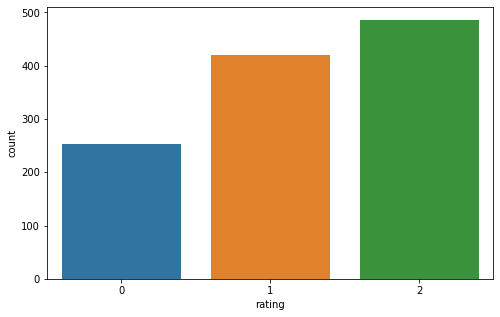

In [12]:
# Visualisasi data distribusi rating
plt.figure(figsize = (8,5))
sns.countplot(data['rating'])

<Figure size 576x360 with 0 Axes>

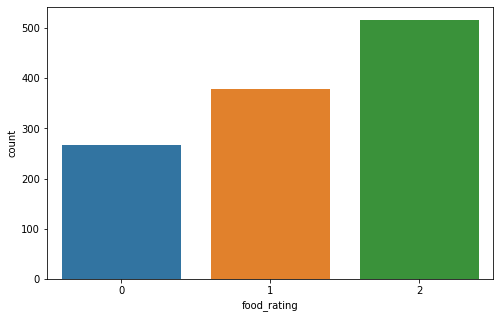

In [13]:
# Visualisasi data distribusi rating makanan
plt.figure(figsize = (8,5))
sns.countplot(data['food_rating'])

<Figure size 576x360 with 0 Axes>

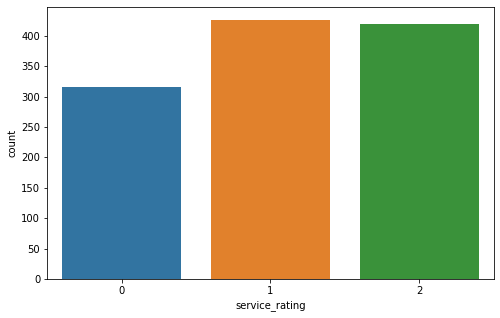

In [14]:
# Visualisasi data distribusi rating layanan
plt.figure(figsize = (8,5))
sns.countplot(data['service_rating'])

**Dengan EDA ini, kita dapat menyimpulkan:**

- Semua 130 restoran dinilai minimal 3 kali dalam skala 0 hingga 2
- Semua 138 pengguna telah memberi peringkat minimal 3 kali
- Untuk distribusi rating, pengguna cukup puas dengan restoran karena tidak signifikan. pengguna telah memberi peringkat 1,2

Jumlah no. dari peringkat adalah 1161, namun jika masing-masing pengguna akan menilai semua restoran itu akan menjadi total 138 * 130 = 17940 peringkat

Untuk model sistem rekomendasi untuk merekomendasikan restoran pilihan teratas, kita harus meminta setiap pengguna memberi peringkat semua restoran. Karena ini tidak mungkin, kami harus memprediksi peringkat yang akan diberikan pengguna ke restoran.

Mari kita buat kumpulan data yang berisi pengguna yang telah secara aktif memberi peringkat setidaknya n kali.

In [15]:
# Berapa banyak user yang memberi rating lebih dari n
n = 3
user_counts = most_rated_users[most_rated_users > n]
len(user_counts)
user_counts

128

U1061    18
U1106    18
U1134    16
U1024    15
U1135    14
         ..
U1127     4
U1072     4
U1040     4
U1110     4
U1060     4
Name: userID, Length: 128, dtype: int64

In [16]:
# Banyak rating yang diberikan
user_counts.sum()

1131

In [17]:
# Semua data rating yang diberikan user
data_final = data[data['userID'].isin(user_counts.index)]
data_final

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1155,U1043,132732,1,1,1
1156,U1043,132630,1,1,1
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


# Data Preparation

In [18]:
# Mengubah data menjadi matriks
final_ratings_matrix = data_final.pivot(index = 'userID', columns = 'placeID', values='rating').fillna(0)
final_ratings_matrix.head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,132626,132630,132654,132660,132663,132665,132667,132668,132706,132715,132717,132723,132732,132733,132740,132754,132755,132766,132767,132768,132773,132825,132830,132834,132845,132846,132847,132851,132854,132856,...,135044,135045,135046,135047,135048,135049,135050,135051,135052,135053,135054,135055,135057,135058,135059,135060,135062,135063,135064,135065,135066,135069,135070,135071,135072,135073,135074,135075,135076,135079,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
U1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
U1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Kalkulasikan densitas matriks. Ini untuk melihat berapa banyak kemungkinan peringkat yang bisa diberikan dan berapa tepatnya peringkat yang diberikan

# Banyak rating yang diberikan
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('banyak rating yang diberikan: ', given_num_of_ratings )

# Total banyaknya peniilaian yang bisa diberikan
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('Banyak kemungkinan rating: ', possible_num_of_ratings)

# Menghitung densitas matriks
density = (given_num_of_ratings / possible_num_of_ratings) * 100
print('density: {:4.2f}%'.format(density))

banyak rating yang diberikan:  884
Banyak kemungkinan rating:  16640
density: 5.31%


## Mengatasi Missing Values

Memeriksa missing values pada variabel data_final

In [20]:
# Memeriksa missing value dengan fungsi isnull()
data_final.isnull().sum()

userID            0
placeID           0
rating            0
food_rating       0
service_rating    0
dtype: int64

Dikarenakan dalam variabel data_final tidak memiliki msissing value, menandakan bahwa data telah bersih dan siap di gunakan untuk modeling

# Modeling and Result

Untuk modeling kita menggunakan dua solusi rekomendasi dengan algoritma yang berbeda, yaitu :
- Popularity based Recommender Model
- Collaborative Filtering Model


Banyak peringkat adalah 0 jadi kami tidak yakin apakah mereka benar-benar 0 atau pengguna belum memberi peringkat.

# Popularity based Recommender Model

Seperti namanya, ini merekomendasikan berdasarkan apa yang sedang tren/populer di seluruh situs. Ini sangat berguna ketika Anda tidak memiliki data masa lalu sebagai referensi untuk merekomendasikan produk kepada pengguna. Ini tidak cocok untuk kelompok penonton atau film tertentu.

*Untuk pemahaman yang lebih baik, Anda dapat merujuk ke kernel -> [Rekomendasi Film Berbasis Popularitas](https://www.kaggle.com/sasha18/popularity-based-movie-recommendation)*

**Hal yang harus dilakukan:**
* Jumlah pengguna yang telah memberi peringkat resto
* Beri peringkat berdasarkan skor
* Rekomendasikan tempat paling populer

In [21]:
# Jumlah user tang rating 
data_grouped = data.groupby('placeID').agg({'userID':'count'}).reset_index()
data_grouped.rename(columns = {'userID': 'score'}, inplace = True )
data_sort = data_grouped.sort_values(['score','placeID'], ascending = False)
data_sort.head()

,placeID,score
123,135085,36
31,132825,32
80,135032,28
98,135052,25
33,132834,25


In [22]:
# Perigkatkan berdasarkan nilai scores
data_sort['Rank'] = data_sort['score'].rank(ascending = 0, method = 'first')
pop_recom = data_sort
pop_recom.head()

,placeID,score,Rank
123,135085,36,1.0
31,132825,32,2.0
80,135032,28,3.0
98,135052,25,4.0
33,132834,25,5.0


In [23]:
print('Ini adalah Restoran terpopuler')
pop_recom[['placeID','score','Rank']].head()

Ini adalah Restoran terpopuler


,placeID,score,Rank
123,135085,36,1.0
31,132825,32,2.0
80,135032,28,3.0
98,135052,25,4.0
33,132834,25,5.0


Karena ini adalah rekomendasi berdasarkan popularitas, ini tidak dipersonalisasi sehingga rekomendasi tetap sama untuk semua pengguna.

## Collaborative filtering model

Menggunakan model based collaborative filtering :SVD (Singular Value Decomposition)

**Hal yang harus dilakukan:**
* Ubah data menjadi tabel pivot -> Format diperlukan untuk model colab
* Buat kolom user_index untuk menghitung no. pengguna -> Ubah konvensi penamaan pengguna dengan menggunakan penghitung
* Terapkan metode SVD pada matriks sparse besar -> Untuk memprediksi peringkat untuk semua resto yang tidak diberi peringkat oleh pengguna
* Prediksi peringkat untuk semua restoran yang tidak dinilai oleh pengguna menggunakan SVD
* Bungkus semuanya menjadi sebuah fungsi

In [24]:
# Mengubah data menjadi pivot table, format ini dibutuhkan untuk model colab
pivot_data = data_final.pivot(index = 'userID', columns = 'placeID', values = 'rating').fillna(0)
pivot_data.shape
pivot_data.head()

(128, 130)

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,132626,132630,132654,132660,132663,132665,132667,132668,132706,132715,132717,132723,132732,132733,132740,132754,132755,132766,132767,132768,132773,132825,132830,132834,132845,132846,132847,132851,132854,132856,...,135044,135045,135046,135047,135048,135049,135050,135051,135052,135053,135054,135055,135057,135058,135059,135060,135062,135063,135064,135065,135066,135069,135070,135071,135072,135073,135074,135075,135076,135079,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
U1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
U1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Buat kolom user_index untuk menghitung no. pengguna -> Ubah konvensi penamaan pengguna dengan menggunakan penghitung
pivot_data['user_index'] = np.arange(0, pivot_data.shape[0],1)
pivot_data.head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,132626,132630,132654,132660,132663,132665,132667,132668,132706,132715,132717,132723,132732,132733,132740,132754,132755,132766,132767,132768,132773,132825,132830,132834,132845,132846,132847,132851,132854,132856,...,135045,135046,135047,135048,135049,135050,135051,135052,135053,135054,135055,135057,135058,135059,135060,135062,135063,135064,135065,135066,135069,135070,135071,135072,135073,135074,135075,135076,135079,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109,user_index
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
U1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
U1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
U1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3
U1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [26]:
pivot_data.set_index(['user_index'], inplace = True)
pivot_data.head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,132626,132630,132654,132660,132663,132665,132667,132668,132706,132715,132717,132723,132732,132733,132740,132754,132755,132766,132767,132768,132773,132825,132830,132834,132845,132846,132847,132851,132854,132856,...,135044,135045,135046,135047,135048,135049,135050,135051,135052,135053,135054,135055,135057,135058,135059,135060,135062,135063,135064,135065,135066,135069,135070,135071,135072,135073,135074,135075,135076,135079,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
user_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Terapkan metode SVD pada matriks sparse besar -> Untuk memprediksi peringkat untuk semua resto yang tidak diberi peringkat oleh pengguna
from scipy.sparse.linalg import svds

# SVD
U,s, VT = svds(pivot_data, k = 10)

# Kontruksi diagonal array di SVD
sigma = np.diag(s)

# Menerapkan SVD akan menamai 3 parameter output
print("U = ",U) # Matriks Ortogonal
print('---------------------------------------------------------')
print("S = ",s) # Nilai tunggal
print('---------------------------------------------------------')
print("VT = ", VT) #Transpose matriks ortogonal


U =  [[ 2.78715782e-02  2.91618540e-02  7.70811695e-02 ... -4.87700614e-02
  -3.93023517e-02  7.74356179e-02]
 [-3.24688962e-02 -8.01036269e-02 -2.06369536e-01 ... -7.98147645e-02
   2.17442564e-02  1.32574089e-01]
 [ 2.51297171e-01  7.30422012e-02 -1.15762870e-01 ... -7.96291336e-02
   2.38070423e-01  1.26700572e-01]
 ...
 [-5.76434516e-18 -1.29663781e-17 -3.83362105e-19 ...  1.74916795e-17
   3.87478657e-18 -2.63220802e-18]
 [-1.28161536e-01 -2.45862716e-01  3.70810741e-02 ...  9.95513466e-02
   1.42823533e-01  7.57573476e-02]
 [ 6.22639806e-02 -1.84539855e-01 -2.04435481e-01 ... -1.16345218e-01
   1.73077175e-01  2.10689444e-01]]
---------------------------------------------------------
S =  [ 7.51719179  7.67564253  8.13565563  8.35409151  8.83110639  9.18332145
  9.18346565  9.70983532 12.38003756 18.97979143]
---------------------------------------------------------
VT =  [[ 7.24536424e-18 -2.33910379e-18  6.77621042e-18 ...  9.18664897e-03
   8.29136455e-02 -5.22672641e-17]
 [ 2

Perhatikan bahwa untuk matriks sparse, Anda dapat menggunakan fungsi sparse.linalg.svds() untuk melakukan dekomposisi. SVD berguna dalam banyak tugas, seperti kompresi data, pengurangan kebisingan mirip dengan Analisis Komponen Utama dan Pengindeksan Semantik Laten (LSI), digunakan dalam pengambilan dokumen dan kesamaan kata dalam penambangan teks

In [28]:
# Prediksi peringkat untuk semua restoran yang tidak dinilai oleh pengguna menggunakan SVD
all_user_predicted_ratings = np.dot(np.dot(U,sigma), VT)

# Prediksi rating
pred_data = pd.DataFrame(all_user_predicted_ratings, columns = pivot_data.columns)
pred_data.head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,132626,132630,132654,132660,132663,132665,132667,132668,132706,132715,132717,132723,132732,132733,132740,132754,132755,132766,132767,132768,132773,132825,132830,132834,132845,132846,132847,132851,132854,132856,...,135044,135045,135046,135047,135048,135049,135050,135051,135052,135053,135054,135055,135057,135058,135059,135060,135062,135063,135064,135065,135066,135069,135070,135071,135072,135073,135074,135075,135076,135079,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
0,1.084612e-17,-8.743162e-18,2.266236e-18,0.175423,-4.550385e-17,2.614207e-17,1.110524e-17,1.628876e-17,1.119519e-17,1.827650e-17,1.707923e-18,1.629263e-17,-4.736034e-18,2.335878e-17,9.804902e-18,1.707923e-18,2.750733e-17,2.851496e-18,-3.944460e-18,2.851496e-18,-5.852601e-19,0.094374,2.431192e-17,3.420521e-17,1.193871e-17,0.357536,0.088069,-1.809910e-17,-7.566952e-17,-1.140664e-16,-2.720802e-17,1.104190,0.054650,0.053558,0.014313,0.030465,0.033142,0.039275,0.019901,0.144079,...,0.047968,0.054698,-0.002369,0.408979,0.182196,-0.058854,-0.013648,0.392426,0.642341,-0.108530,0.078160,-0.013801,0.086165,-0.303805,0.316650,0.225509,0.251313,0.265444,0.041419,-0.128250,-0.195189,0.030198,0.031275,0.077813,-0.186948,0.091709,0.050084,0.367079,0.012244,-0.092594,0.141167,0.204458,0.066725,0.227847,-0.049773,-1.813630e-17,2.444128e-17,0.217707,0.119304,-2.250833e-17
1,-1.179439e-17,-3.155926e-18,-1.502388e-17,0.204657,1.011937e-16,-7.080447e-17,-2.481193e-17,-3.559388e-17,-2.468279e-17,-9.059076e-17,-1.025481e-18,-4.626312e-17,-4.972678e-18,-5.426098e-17,-2.840314e-17,-1.025481e-18,-7.590091e-17,-5.217987e-18,-1.040531e-17,-5.217987e-18,-9.805894e-18,0.439186,-4.379015e-17,-8.650070e-17,-4.527210e-17,0.183759,0.394376,3.665565e-17,1.470108e-17,2.909477e-16,4.466439e-17,0.936704,-0.034819,0.598855,0.000954,-0.065169,-0.064680,0.012051,0.029160,0.234531,...,0.030265,0.591575,0.150778,-0.107875,0.071751,0.172928,-0.036338,0.666436,1.147075,-0.382132,0.073745,0.008285,0.084022,-0.361236,0.707896,0.423233,0.872998,-0.192323,0.083784,-0.082329,0.230301,0.020604,0.052505,-0.051517,0.174143,-0.039834,0.055066,0.554255,0.037732,0.170682,0.196347,0.099066,0.031653,1.276811,-0.040446,7.125073e-17,-7.822497e-17,0.401924,0.082374,6.472344e-17
2,4.343965e-17,5.105161e-18,9.131529e-18,0.274472,2.927210e-16,5.216395e-17,4.420153e-17,4.944536e-17,-5.255614e-18,5.098524e-17,2.308173e-17,1.673093e-16,-1.539053e-17,8.384482e-18,4.608941e-17,2.308173e-17,-1.063425e-17,1.935594e-17,-1.918570e-17,1.935594e-17,-1.022442e-17,1.388201,7.472367e-17,1.466345e-16,1.510745e-17,1.603227,1.067114,1.103963e-16,-2.745278e-17,8.036736e-16,2.121305e-16,2.234381,0.000840,0.856515,0.045062,-0.071674,-0.063582,0.177527,0.141250,-0.246338,...,0.165486,-0.360265,0.068556,0.384836,0.443239,0.484909,0.023105,-0.177720,0.539749,0.025602,0.130554,0.397389,-0.188523,0.000155,1.980402,-0.161897,0.053568,-0.271992,0.512590,0.150307,-0.221663,0.008745,0.044273,0.062766,-0.064297,-0.209689,0.182274,1.384122,-0.012311,1.102103,0.946897,0.220074,0.039438,0.559835,0.299039,1.798478e-16,2.960399e-17,0.034631,0.153178,1.418414e-16
3,-4.969270e-17,-1.424436e-17,-2.924324e-17,0.480896,-2.849674e-16,-1.271179e-16,-9.296879e-17,-3.643146e-17,-5.954542e-18,-1.449949e-16,-4.472180e-18,-1.556124e-16,3.117394e-18,-3.895773e-17,-9.655036e-17,-4.472180e-18,-1.179244e-16,-2.423420e-18,3.404692e-18,-2.423420e-18,-2.681982e-17,0.414563,-9.669531e-17,-2.390979e-16,-9.036620e-17,-0.143641,-0.054362,-1.282154e-16,-3.733458e-16,-8.834495e-16,-2.153541e-16,-0.024541,0.128258,0.042332,-0.048636,0.133098,0.125720,-0.175170,-0.107790,0.489595,...,-0.059119,0.345425,0.277957,0.117153,0.463455,0.112815,0.100405,0.413399,0.168809,0.029483,-0.106255,0.196990,0.049124,-0.016290,-0.672381,0.568488,0.862469,0.446370,0.062209,-0.323795,0.173484,-0.016668,0.016854,0.027915,0.308671,0.172175,0.133474,0.414595,0.136508,-0.439354,0.022667,0.051184,-0.035111,-0.45

**Membungkus semua menjadi sebuah fungsi**

**Hal yang harus dilakukan :**

- Buat fungsi untuk merekomendasikan tempat dengan peringkat prediksi tertinggi
- Gunakan fungsi untuk merekomendasikan tempat berdasarkan ID pengguna, peringkat sebelumnya, peringkat yang diprediksi, jumlah tempat

In [29]:
# Merekomendasikan tempat dengan rating prediksi tertinggi
def recommend_places(userID, pivot_data, pred_data, num_recommendations):
  user_index = userID-1 # Index mulai dari 0

  sorted_user_ratings = pivot_data.iloc[user_index].sort_values(ascending = False) # Mengsorting rating pengguna

  sorted_user_predictions = pred_data.iloc[user_index].sort_values(ascending = False) # Prediksi pengguna yang tersortir

  temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
  temp.index.name = 'ID Tempat yang direkomendasi'
  temp.columns = ['user_ratings', 'user_predictions']

  temp = temp.loc[temp.user_ratings == 0]
  temp = temp.sort_values('user_predictions', ascending = False)
  print('\n  Dibawah ini adalah ID rekomendasi tempat untuk Pelanggan(user_id = {}):\n'.format(userID))
  print(temp.head(num_recommendations))

In [30]:
# Rekomendasi tempat berdasarkan pada userID, past ratings, predicted ratings, num of places

userID = 26


num_recommendations = 10
recommend_places(userID, pivot_data, pred_data, num_recommendations)



  Dibawah ini adalah ID rekomendasi tempat untuk Pelanggan(user_id = 26):

                              user_ratings  user_predictions
ID Tempat yang direkomendasi                                
135075                                 0.0          0.510513
132754                                 0.0          0.463748
135052                                 0.0          0.456283
132834                                 0.0          0.386259
135079                                 0.0          0.321052
132755                                 0.0          0.313391
132723                                 0.0          0.277505
135062                                 0.0          0.241650
132951                                 0.0          0.227298
135064                                 0.0          0.214211


# EVALUATION

## Metrik evaluasi accuracy

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X = data_sort.drop(['score'], axis=1)
y = data_sort['score']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, 
                                                     random_state=256)
print(f'Total Sampel pada Keseluruhan: {len(X)}')
print(f'Total Sampel pada Dataset train: {len(X_train)}')
print(f'Total Sampel pada Dataset test: {len(X_test)}')

Total Sampel pada Keseluruhan: 130
Total Sampel pada Dataset train: 104
Total Sampel pada Dataset test: 26


In [58]:
# Training a binary classifier using Random Forest Algorithm with default hyperparameters
classifier = RandomForestClassifier(random_state=18)
classifier.fit(X_train, y_train)

# Here X_test, y_test are the test data points
predictions = classifier.predict(X_test)

# Importing all necessary libraries
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print("\nAccuracy of the classifier is: ", accuracy_score(y_test, predictions))


RandomForestClassifier(random_state=18)


Accuracy of the classifier is:  0.8076923076923077


## Metrik Evaluasi Precision

In [73]:
# Precision
# Importing all necessary libraries
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print("Precision Score of the classifier is: ", precision_score(y_test, predictions, pos_label='positive', average='micro' ))



Precision Score of the classifier is:  0.8076923076923077


In [78]:
precision = precision_score(y_test, predictions, pos_label='positive', average='micro' )
print(precision)

0.8076923076923077


## Evaluasi model menggunakan RMSE

RMSE adalah akar kuadrat dari rata-rata kuadrat error. Pengaruh setiap kesalahan pada RMSE sebanding dengan ukuran kesalahan kuadrat; sehingga kesalahan yang lebih besar memiliki efek besar yang tidak proporsional pada RMSE. Akibatnya, RMSE sensitif terhadap outlier.


**Hal yang harus dilakukan:**
* Peringkat aktual yang diberikan oleh pengguna
* Peringkat yang diprediksi untuk suatu tempat
* Hitung RMSE

In [35]:
# Peringkat aktual yang diberikan oleh pengguna
final_ratings_matrix.head()

# Rata-rata peringkat aktual untuk setiap tempat
final_ratings_matrix.mean().head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,132626,132630,132654,132660,132663,132665,132667,132668,132706,132715,132717,132723,132732,132733,132740,132754,132755,132766,132767,132768,132773,132825,132830,132834,132845,132846,132847,132851,132854,132856,...,135044,135045,135046,135047,135048,135049,135050,135051,135052,135053,135054,135055,135057,135058,135059,135060,135062,135063,135064,135065,135066,135069,135070,135071,135072,135073,135074,135075,135076,135079,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
U1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
U1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


placeID
132560    0.015625
132561    0.023438
132564    0.023438
132572    0.117188
132583    0.031250
dtype: float64

In [36]:
# Prediksi peringkat suatu tempat
pred_data.head()

# Rata-rata prediksi rating untuk setiap tempat
pred_data.mean().head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,132626,132630,132654,132660,132663,132665,132667,132668,132706,132715,132717,132723,132732,132733,132740,132754,132755,132766,132767,132768,132773,132825,132830,132834,132845,132846,132847,132851,132854,132856,...,135044,135045,135046,135047,135048,135049,135050,135051,135052,135053,135054,135055,135057,135058,135059,135060,135062,135063,135064,135065,135066,135069,135070,135071,135072,135073,135074,135075,135076,135079,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
0,1.084612e-17,-8.743162e-18,2.266236e-18,0.175423,-4.550385e-17,2.614207e-17,1.110524e-17,1.628876e-17,1.119519e-17,1.827650e-17,1.707923e-18,1.629263e-17,-4.736034e-18,2.335878e-17,9.804902e-18,1.707923e-18,2.750733e-17,2.851496e-18,-3.944460e-18,2.851496e-18,-5.852601e-19,0.094374,2.431192e-17,3.420521e-17,1.193871e-17,0.357536,0.088069,-1.809910e-17,-7.566952e-17,-1.140664e-16,-2.720802e-17,1.104190,0.054650,0.053558,0.014313,0.030465,0.033142,0.039275,0.019901,0.144079,...,0.047968,0.054698,-0.002369,0.408979,0.182196,-0.058854,-0.013648,0.392426,0.642341,-0.108530,0.078160,-0.013801,0.086165,-0.303805,0.316650,0.225509,0.251313,0.265444,0.041419,-0.128250,-0.195189,0.030198,0.031275,0.077813,-0.186948,0.091709,0.050084,0.367079,0.012244,-0.092594,0.141167,0.204458,0.066725,0.227847,-0.049773,-1.813630e-17,2.444128e-17,0.217707,0.119304,-2.250833e-17
1,-1.179439e-17,-3.155926e-18,-1.502388e-17,0.204657,1.011937e-16,-7.080447e-17,-2.481193e-17,-3.559388e-17,-2.468279e-17,-9.059076e-17,-1.025481e-18,-4.626312e-17,-4.972678e-18,-5.426098e-17,-2.840314e-17,-1.025481e-18,-7.590091e-17,-5.217987e-18,-1.040531e-17,-5.217987e-18,-9.805894e-18,0.439186,-4.379015e-17,-8.650070e-17,-4.527210e-17,0.183759,0.394376,3.665565e-17,1.470108e-17,2.909477e-16,4.466439e-17,0.936704,-0.034819,0.598855,0.000954,-0.065169,-0.064680,0.012051,0.029160,0.234531,...,0.030265,0.591575,0.150778,-0.107875,0.071751,0.172928,-0.036338,0.666436,1.147075,-0.382132,0.073745,0.008285,0.084022,-0.361236,0.707896,0.423233,0.872998,-0.192323,0.083784,-0.082329,0.230301,0.020604,0.052505,-0.051517,0.174143,-0.039834,0.055066,0.554255,0.037732,0.170682,0.196347,0.099066,0.031653,1.276811,-0.040446,7.125073e-17,-7.822497e-17,0.401924,0.082374,6.472344e-17
2,4.343965e-17,5.105161e-18,9.131529e-18,0.274472,2.927210e-16,5.216395e-17,4.420153e-17,4.944536e-17,-5.255614e-18,5.098524e-17,2.308173e-17,1.673093e-16,-1.539053e-17,8.384482e-18,4.608941e-17,2.308173e-17,-1.063425e-17,1.935594e-17,-1.918570e-17,1.935594e-17,-1.022442e-17,1.388201,7.472367e-17,1.466345e-16,1.510745e-17,1.603227,1.067114,1.103963e-16,-2.745278e-17,8.036736e-16,2.121305e-16,2.234381,0.000840,0.856515,0.045062,-0.071674,-0.063582,0.177527,0.141250,-0.246338,...,0.165486,-0.360265,0.068556,0.384836,0.443239,0.484909,0.023105,-0.177720,0.539749,0.025602,0.130554,0.397389,-0.188523,0.000155,1.980402,-0.161897,0.053568,-0.271992,0.512590,0.150307,-0.221663,0.008745,0.044273,0.062766,-0.064297,-0.209689,0.182274,1.384122,-0.012311,1.102103,0.946897,0.220074,0.039438,0.559835,0.299039,1.798478e-16,2.960399e-17,0.034631,0.153178,1.418414e-16
3,-4.969270e-17,-1.424436e-17,-2.924324e-17,0.480896,-2.849674e-16,-1.271179e-16,-9.296879e-17,-3.643146e-17,-5.954542e-18,-1.449949e-16,-4.472180e-18,-1.556124e-16,3.117394e-18,-3.895773e-17,-9.655036e-17,-4.472180e-18,-1.179244e-16,-2.423420e-18,3.404692e-18,-2.423420e-18,-2.681982e-17,0.414563,-9.669531e-17,-2.390979e-16,-9.036620e-17,-0.143641,-0.054362,-1.282154e-16,-3.733458e-16,-8.834495e-16,-2.153541e-16,-0.024541,0.128258,0.042332,-0.048636,0.133098,0.125720,-0.175170,-0.107790,0.489595,...,-0.059119,0.345425,0.277957,0.117153,0.463455,0.112815,0.100405,0.413399,0.168809,0.029483,-0.106255,0.196990,0.049124,-0.016290,-0.672381,0.568488,0.862469,0.446370,0.062209,-0.323795,0.173484,-0.016668,0.016854,0.027915,0.308671,0.172175,0.133474,0.414595,0.136508,-0.439354,0.022667,0.051184,-0.035111,-0.45

placeID
132560   -1.171132e-18
132561    3.334107e-18
132564   -1.491341e-18
132572    9.900262e-02
132583    3.323385e-02
dtype: float64

In [37]:
# Kalkulasi nilai RMSE
rmse_data = pd.concat([final_ratings_matrix.mean(), pred_data.mean()], axis = 1)
rmse_data.columns = ['Avg_actual_rating', 'Avg_predicted_ratings']
print(rmse_data.shape)
rmse_data['place_index'] = np.arange(0, rmse_data.shape[0],1)
rmse_data.head()


(130, 2)


,Avg_actual_rating,Avg_predicted_ratings,place_index
placeID,,,
132560,0.015625,-1.171132e-18,0
132561,0.023438,3.334107e-18,1
132564,0.023438,-1.491341e-18,2
132572,0.117188,9.900262e-02,3
132583,0.031250,3.323385e-02,4


Text(0.5, 1.0, 'rmse_data')

Text(0, 0.5, 'root_mean_squared_error')

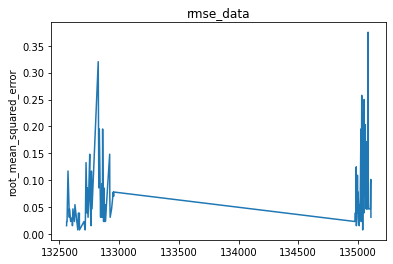

In [38]:
plt.plot(rmse_data['Avg_actual_rating'])

plt.title('rmse_data')
plt.ylabel('root_mean_squared_error')

plt.show()

Text(0.5, 1.0, 'rmse_data')

Text(0, 0.5, 'root_mean_squared_error')

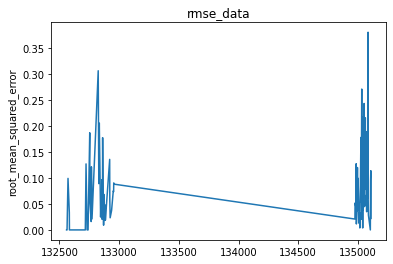

In [39]:
plt.plot(rmse_data['Avg_predicted_ratings'])

plt.title('rmse_data')
plt.ylabel('root_mean_squared_error')

plt.show()

In [40]:
# Nilai RMSE pada SVD Model
RMSE = round((((rmse_data.Avg_actual_rating - rmse_data.Avg_predicted_ratings) ** 2).mean() ** 0.5),5)
print('\n RMSE SVD Model = {}\n'.format(RMSE))


 RMSE SVD Model = 0.01874



** Ringkasan **

Sistem pemberi rekomendasi berbasis popularitas tidak dipersonalisasi dan rekomendasi didasarkan pada jumlah frekuensi, yang mungkin tidak sesuai untuk pengguna. Model berbasis popularitas akan merekomendasikan 5 tempat yang sama untuk semua pengguna tetapi model berbasis Collaborative Filtering telah merekomendasikan seluruh daftar yang berbeda berdasarkan peringkat pengguna.

Collaborative Filtering Berbasis Model adalah sistem rekomendasi yang dipersonalisasi, rekomendasi didasarkan pada perilaku / interaksi pengguna di masa lalu dan tidak bergantung pada informasi tambahan apa pun. Dalam hal ini kami memiliki peringkat yang menunjukkan interaksi.